***Predicting success of Bank marketing Calls: Implementing and Comparing various ML classification algorithms***

Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

In [2]:
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import matplotlib.pyplot as plt

In [3]:
df_baf=pd.read_csv('bank-additional-full.csv',sep=';')
df_baf.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_baf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
profile = pp.ProfileReport(df_baf)
profile.to_file("bank-additional-full-profileoutput_ydupl.html")

In [5]:
df_bafd=df_baf.drop(['euribor3m','nr.employed'],axis=1) #dropping correlated features
df_bafd.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,no


# Converting Categorical Data to numerical

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_bafd, test_size=0.2)
train.shape,test.shape

((32950, 19), (8238, 19))

In [7]:
c1=train.iloc[:,1:10] #first set of categorical variables
c1.head(5) 

,job,marital,education,default,housing,loan,contact,month,day_of_week
31486,admin.,single,university.degree,no,no,no,cellular,may,wed
7318,admin.,single,university.degree,no,yes,yes,telephone,may,thu
40319,services,divorced,high.school,no,yes,no,cellular,jul,fri
899,technician,married,professional.course,no,yes,no,telephone,may,wed
36668,student,single,high.school,no,yes,no,telephone,jun,fri


In [8]:
c2=train.iloc[:,14:15] #second set of categorical variable
c2.head(5) 

,poutcome
31486,nonexistent
7318,nonexistent
40319,nonexistent
899,nonexistent
36668,nonexistent


In [9]:
c1 = c1.astype('category').apply(lambda x: x.cat.codes) #converting to numerical
c1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week
31486,0,2,6,0,0,0,0,6,4
7318,0,2,6,0,2,2,1,6,2
40319,7,0,3,0,2,0,0,3,0
899,9,1,5,0,2,0,1,6,4
36668,8,2,3,0,2,0,1,4,0


In [10]:
c2 = c2.astype('category').apply(lambda x: x.cat.codes) #converting to numerical
c2.head()

,poutcome
31486,1
7318,1
40319,1
899,1
36668,1


In [11]:
c3=train.iloc[:,-1:] #predicted variable
c3.head()

,y
31486,no
7318,no
40319,no
899,no
36668,no


In [12]:
c3=c3.astype('category').apply(lambda x: x.cat.codes) #converting to numeric
c3.head()

,y
31486,0
7318,0
40319,0
899,0
36668,0


In [13]:
train_num=pd.concat([train.iloc[:,0:1],c1,train.iloc[:,10:14],c2,train.iloc[:,15:18],c3],axis=1)
train_num.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
31486,29,0,2,6,0,0,0,0,6,4,142,3,999,0,1,-1.8,92.893,-46.2,0
7318,59,0,2,6,0,2,2,1,6,2,421,3,999,0,1,1.1,93.994,-36.4,0
40319,55,7,0,3,0,2,0,0,3,0,160,3,999,0,1,-1.7,94.215,-40.3,0
899,46,9,1,5,0,2,0,1,6,4,144,2,999,0,1,1.1,93.994,-36.4,0
36668,24,8,2,3,0,2,0,1,4,0,109,1,999,0,1,-2.9,92.963,-40.8,0


In [14]:
c1t=test.iloc[:,1:10] #first set of categorical variables test
c1t.head(5) 

,job,marital,education,default,housing,loan,contact,month,day_of_week
6114,blue-collar,married,basic.4y,no,yes,no,telephone,may,tue
21533,technician,single,high.school,no,yes,no,cellular,aug,tue
2210,admin.,married,unknown,no,no,no,telephone,may,mon
17362,admin.,single,university.degree,no,yes,no,cellular,jul,mon
14022,services,single,high.school,no,no,no,cellular,jul,fri


In [15]:
c2t=test.iloc[:,14:15] #second set of categorical variable test
c2t.head(5) 

,poutcome
6114,nonexistent
21533,nonexistent
2210,nonexistent
17362,nonexistent
14022,nonexistent


In [16]:
c1t = c1t.astype('category').apply(lambda x: x.cat.codes) #converting to numerical
c1t.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week
6114,1,1,0,0,2,0,1,6,3
21533,9,2,3,0,2,0,0,1,3
2210,0,1,7,0,0,0,1,6,1
17362,0,2,6,0,2,0,0,3,1
14022,7,2,3,0,0,0,0,3,0


In [17]:
c2t = c2t.astype('category').apply(lambda x: x.cat.codes) #converting to numerical test
c2t.head()

,poutcome
6114,1
21533,1
2210,1
17362,1
14022,1


In [49]:
ytest=test.iloc[:,-1:] #predicted variable of test
ytest.head()


,y
6114,no
21533,no
2210,no
17362,no
14022,no


In [50]:
ytest_num = ytest.astype('category').apply(lambda x: x.cat.codes) #converting to numerical test
ytest_num.to_csv('ytest_num.csv')

In [51]:
ytest_num.head()

,y
6114,0
21533,0
2210,0
17362,0
14022,0


In [20]:
test_num=pd.concat([test.iloc[:,0:1],c1t,test.iloc[:,10:14],c2t,test.iloc[:,15:18]],axis=1)
test_num.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
6114,30,1,1,0,0,2,0,1,6,3,170,1,999,0,1,1.1,93.994,-36.4
21533,30,9,2,3,0,2,0,0,1,3,183,13,999,0,1,1.4,93.444,-36.1
2210,37,0,1,7,0,0,0,1,6,1,89,3,999,0,1,1.1,93.994,-36.4
17362,43,0,2,6,0,2,0,0,3,1,48,20,999,0,1,1.4,93.918,-42.7
14022,36,7,2,3,0,0,0,0,3,0,70,2,999,0,1,1.4,93.918,-42.7


 # Generating Model from Training Data

In [21]:
trd=train_num.iloc[:,:].T #train data
trd

,31486,7318,40319,899,36668,12056,31266,15928,673,40148,...,5507,24760,32378,39694,24481,13502,8886,38756,24597,9851
age,29.000,59.000,55.000,46.000,24.000,37.000,34.000,44.000,46.000,30.000,...,42.000,54.0,29.000,50.000,47.0,34.000,49.000,33.000,51.0,48.000
job,0.000,0.000,7.000,9.000,8.000,0.000,1.000,1.000,0.000,8.000,...,0.000,6.0,1.000,10.000,0.0,9.000,0.000,0.000,0.0,1.000
marital,2.000,2.000,0.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,...,1.000,1.0,2.000,1.000,0.0,2.000,0.000,1.000,1.0,1.000
education,6.000,6.000,3.000,5.000,3.000,3.000,7.000,2.000,3.000,5.000,...,0.000,2.0,0.000,3.000,6.0,6.000,6.000,6.000,3.0,2.000
default,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.0,1.000,0.000,1.0,0.000,0.000,0.000,0.0,1.000
housing,0.000,2.000,2.000,2.000,2.000,0.000,0.000,2.000,0.000,2.000,...,0.000,2.0,2.000,0.000,0.0,2.000,2.000,2.000,2.0,0.000
loan,0.000,2.000,0.000,0.000,0.000,0.000,2.000,0.000,2.000,0.000,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.0,2.000
contact,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,...,1.000,0.0,0.000,1.000,0.0,0.000,1.000,1.000,0.0,1.000
month,6.000,6.000,3.000,6.000,4.000,4.000,6.000,3.000,6.000,3.000,...,6.000,7.0,6.000,6.000,7.0,3.000,4.000,7.000,7.0,4.000
day_of_week,4.000,2.000,0.000,4.000,0.000,0.000,4.000,1.000,3.000,4.000,...,1.000,3.0,0.000,3.000,1.0,2.000,2.000,4.000,1.0,4.000


In [22]:
X=[]
col=trd.shape[0]-1
for i in range(col):
    X.append(trd.iloc[i].values)
X.append(np.ones(trd.shape[1]))
X=np.array(X)
X

array([[ 29.   ,  59.   ,  55.   , ...,  33.   ,  51.   ,  48.   ],
       [  0.   ,   0.   ,   7.   , ...,   0.   ,   0.   ,   1.   ],
       [  2.   ,   2.   ,   0.   , ...,   1.   ,   1.   ,   1.   ],
       ...,
       [ 92.893,  93.994,  94.215, ...,  92.649,  93.2  ,  94.465],
       [-46.2  , -36.4  , -40.3  , ..., -30.1  , -42.   , -41.8  ],
       [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])

In [23]:
featurelen=trd.shape[0]
observationlen=trd.shape[1]
featurelen

19

In [24]:
y=trd.iloc[-1].values
y=np.asmatrix(y)
y

matrix([[0., 0., 0., ..., 1., 0., 0.]])

In [25]:
m=observationlen
theta=np.matrix([np.zeros(featurelen)])
theta

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

# Implementing Logistic Regression Algo. 

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(np.negative(z)))
Jval=[]
iterval=[]
def logisticRegression(error_thres,maxi,s):
    theta=np.matrix([np.zeros(featurelen)]) 
    for i in range(maxi):
        z=theta.dot(X)
        h=sigmoid(z)
        J=(-1/(m))*(np.sum(y.dot(np.log(h.T))+(1-y).dot(np.log(1-h.T))))
        Jval.append(J)
        i+=1
        iterval.append(i)
        if(J<error_thres and (len(Jval)>10 and np.mean(Jval[-10:])==Jval[-1])):
            break
        else:
            theta=gradientDescent(X,y,theta,s)
    return(theta)

In [28]:
def gradientDescent(X,y,theta,s):
        theta=theta+((s/m)*X.dot(y.T-sigmoid(theta.dot(X)).T)).T
        return(theta)

In [29]:
theta=logisticRegression(0.001,1000,0.00001) #value of theta from generated model 
theta

matrix([[-1.65419758e-04,  1.08211938e-04,  2.16026889e-05,
          2.16476030e-04, -9.39188551e-05,  6.98145608e-06,
         -2.06650808e-05, -1.58055658e-04, -2.87515346e-04,
         -3.03029103e-05,  3.86338592e-03, -3.72201206e-04,
         -3.33513831e-03,  3.69220997e-05, -8.04172417e-05,
         -9.95738124e-04, -2.51165130e-03,  1.41990254e-03,
         -2.45830988e-05]])

In [30]:
Jval[:10]

[0.6931471805599456,
 0.43437067592283024,
 0.35709703955018846,
 0.3152873203164229,
 0.30103533089019013,
 0.29411089674328994,
 0.28861222189208824,
 0.2841075502961541,
 0.28041053786874237,
 0.27736686178145314]

In [31]:
def plotting(x,y):
    p=plt.plot(x,y)
    return(plt.show(p))


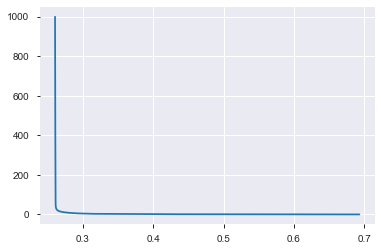

In [32]:
import matplotlib as mt
plt.plot(Jval,list(range(len(Jval))))

# Applying test Data on the Generated Model

In [33]:
test_num.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
6114,30,1,1,0,0,2,0,1,6,3,170,1,999,0,1,1.1,93.994,-36.4
21533,30,9,2,3,0,2,0,0,1,3,183,13,999,0,1,1.4,93.444,-36.1
2210,37,0,1,7,0,0,0,1,6,1,89,3,999,0,1,1.1,93.994,-36.4
17362,43,0,2,6,0,2,0,0,3,1,48,20,999,0,1,1.4,93.918,-42.7
14022,36,7,2,3,0,0,0,0,3,0,70,2,999,0,1,1.4,93.918,-42.7


In [34]:
tsd=test_num.iloc[:,:].T #test data
tsd

,6114,21533,2210,17362,14022,9722,2991,2154,22821,36489,...,26600,35455,20277,38588,27756,21378,34081,17919,10731,2269
age,30.000,30.000,37.000,43.000,36.000,42.000,30.000,45.000,32.000,36.000,...,41.0,40.000,29.000,60.000,38.000,52.000,33.000,42.000,38.000,28.000
job,1.000,9.000,0.000,0.000,7.000,1.000,9.000,1.000,9.000,0.000,...,1.0,0.000,0.000,5.000,9.000,7.000,0.000,0.000,0.000,1.000
marital,1.000,2.000,1.000,2.000,2.000,2.000,1.000,1.000,2.000,1.000,...,1.0,2.000,2.000,1.000,1.000,1.000,0.000,0.000,1.000,2.000
education,0.000,3.000,7.000,6.000,3.000,2.000,5.000,0.000,6.000,6.000,...,0.0,3.000,6.000,0.000,5.000,3.000,6.000,3.000,6.000,2.000
default,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
housing,2.000,2.000,0.000,2.000,0.000,0.000,1.000,2.000,2.000,0.000,...,2.0,0.000,2.000,2.000,0.000,2.000,2.000,2.000,0.000,1.000
loan,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,2.000,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1.000
contact,1.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,...,0.0,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000
month,6.000,1.000,6.000,3.000,3.000,4.000,6.000,6.000,1.000,4.000,...,7.0,6.000,1.000,8.000,5.000,1.000,6.000,3.000,4.000,6.000
day_of_week,3.000,3.000,1.000,1.000,0.000,1.000,4.000,1.000,1.000,4.000,...,2.0,1.000,1.000,0.000,2.000,1.000,4.000,3.000,3.000,3.000


In [35]:
Xtest=[]
col=tsd.shape[0]
for i in range(col):
    Xtest.append(tsd.iloc[i].values)
Xtest.append(np.ones(tsd.shape[1]))
Xtest=np.array(Xtest)
Xtest.T.shape

(8238, 19)

In [36]:
out=sigmoid(Xtest.T@theta.T)
out

matrix([[0.04874602],
        [0.05113686],
        [0.03610537],
        ...,
        [0.05527077],
        [0.08050442],
        [0.03380114]])

In [37]:
def predictY(x,theta):
    out=sigmoid(x.T@theta.T)
    yout=np.zeros(len(out))
    for i in range(len(out)):
        if(out[i]<=0.5):
            yout[i]=0
        else:
            yout[i]=1
    return(yout)

In [38]:
finalout=predictY(Xtest,theta)
finalout

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
ytest_num.head()

,y
6114,0
21533,0
2210,0
17362,0
14022,0


# Applying Sklearn Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression().fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
ypredLR=modelLR.predict(test_num)

# Classification Metrics for sklearn LR

In [42]:
target_names = ['No', 'Yes']
print(classification_report(ytest_num, ypredLR, target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.97      0.95      7341
         Yes       0.60      0.36      0.45       897

    accuracy                           0.90      8238
   macro avg       0.76      0.67      0.70      8238
weighted avg       0.89      0.90      0.89      8238



In [43]:
out.shape

(8238, 1)

# Classification Metrics for implemented LR

In [44]:
print(classification_report(ytest_num, finalout, target_names=target_names))

              precision    recall  f1-score   support

          No       0.92      0.97      0.95      7341
         Yes       0.62      0.33      0.43       897

    accuracy                           0.90      8238
   macro avg       0.77      0.65      0.69      8238
weighted avg       0.89      0.90      0.89      8238



In [46]:
train_num.to_csv('train_num.csv')

In [47]:
test_num.to_csv('test_num.csv')

In [ ]:
ytest_num=pd.read_csv('ytest_num.csv',set_index=(['rollno','name']))

# APPLYING DECISION TREE CLASSIFIER

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtclf=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtclf.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [53]:
# Applying model on test
ypredDT=dtclf.predict(test_num)

#  Classification Metrics for Decision Tree Classifier

In [54]:
from sklearn.metrics import classification_report
target_names = ['No', 'Yes']
print(classification_report(ytest_num,ypredDT,target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.94      0.94      7341
         Yes       0.49      0.50      0.49       897

    accuracy                           0.89      8238
   macro avg       0.71      0.72      0.71      8238
weighted avg       0.89      0.89      0.89      8238



#  APPLYING NAIVE BAYES

In [55]:
gnb=GaussianNB()
gnb.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
 # Applying Model on Test
y_predNB=gnb.predict(test_num)

# Classification Metrics for Naive Bayes

In [57]:
print(classification_report(ytest_num,y_predNB,target_names= target_names))

              precision    recall  f1-score   support

          No       0.93      0.90      0.92      7341
         Yes       0.37      0.48      0.42       897

    accuracy                           0.85      8238
   macro avg       0.65      0.69      0.67      8238
weighted avg       0.87      0.85      0.86      8238



# MLP CLASSIFIER

In [67]:
mlpclf=MLPClassifier()

In [68]:
mlpclf.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Test Predict

In [69]:
ypredMLP=mlpclf.predict(test_num)

# Classification Metrics for MLP Classifier

In [70]:
print(classification_report(ytest_num,ypredMLP,target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.96      0.95      7341
         Yes       0.57      0.43      0.49       897

    accuracy                           0.90      8238
   macro avg       0.75      0.70      0.72      8238
weighted avg       0.89      0.90      0.90      8238



# Accuracy scores

## Implemented Logistic Regression

In [62]:
accuracy_score(ytest_num,finalout)

0.9049526584122359

## sklearn Logistic Regression

In [63]:
accuracy_score(ytest_num,ypredLR)

0.9045884923525127

## Naive Bayes' Classifier

In [64]:
accuracy_score(ytest_num,y_predNB)

0.8545763534838553

## Decision Tree Classifier

In [65]:
accuracy_score(ytest_num,ypredDT)

0.887836853605244

## MLP Classifier

In [71]:
accuracy_score(ytest_num,ypredMLP)

0.9027676620538966

# ROC CURVES

## Implemented Logistic Regression

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [78]:
fpr, tpr, thresholds = roc_curve(ytest_num,out)

In [79]:
fpr,tpr

(array([0.00000000e+00, 0.00000000e+00, 2.72442447e-04, ...,
        8.77537120e-01, 8.77537120e-01, 1.00000000e+00]),
 array([0.        , 0.00111483, 0.00111483, ..., 0.99888517, 1.        ,
        1.        ]))

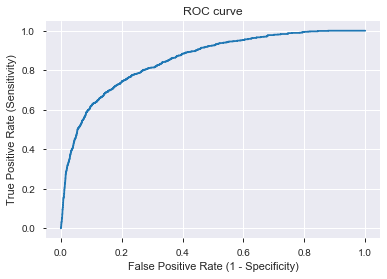

In [80]:
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [81]:
roc_auc_score(ytest_num,out)

0.853709188493574

## sklearn Logistic Regression

In [82]:
probLR=modelLR.predict_proba(test_num)[:,1]
probLR

array([0.01304371, 0.01228715, 0.01158596, ..., 0.01366361, 0.02711143,
       0.00951199])

In [83]:
fpr_lr, tpr_lr, thresholds = roc_curve(ytest_num,probLR)

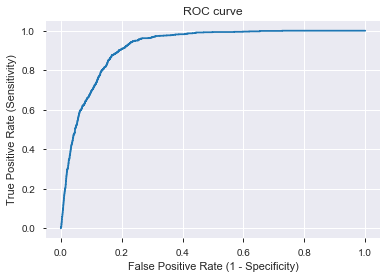

In [84]:
plt.plot(fpr_lr,tpr_lr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [85]:
roc_auc_score(ytest_num,probLR)

0.9184329487095962

## Naive Bayes' classifier

In [86]:
probNB=gnb.predict_proba(test_num)[:,1]

In [87]:
fpr_nb,tpr_nb, thresholds = roc_curve(ytest_num,probNB)

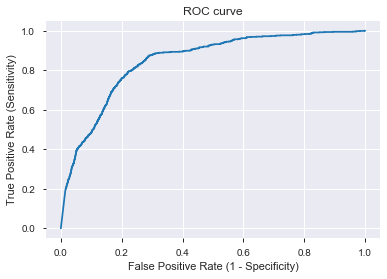

In [88]:
plt.plot(fpr_nb, tpr_nb)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [89]:
roc_auc_score(ytest_num,probNB)

0.8464160378394312

## Decision Tree classifier

In [90]:
probDT=dtclf.predict_proba(test_num)[:,1]
probDT

array([0., 0., 0., ..., 0., 0., 0.])

In [91]:
fpr_dt,tpr_dt, thresholds = roc_curve(ytest_num,probDT)

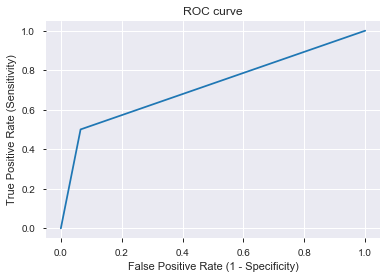

In [92]:
plt.plot(fpr_dt,tpr_dt)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [93]:
roc_auc_score(ytest_num,probDT)

0.7178580556629988

## MLP Classifier

In [94]:
probMLP=mlpclf.predict_proba(test_num)[:,1]
probMLP

array([0.00303967, 0.00741159, 0.00085767, ..., 0.00334408, 0.01046343,
       0.00040571])

In [95]:
fpr_mlp,tpr_mlp, thresholds = roc_curve(ytest_num,probMLP)

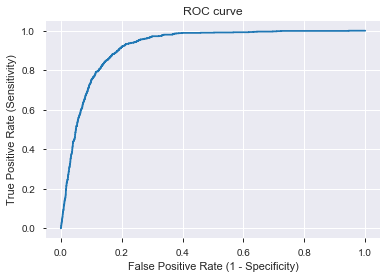

In [96]:
plt.plot(fpr_mlp,tpr_mlp)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [97]:
roc_auc_score(ytest_num,probMLP)

0.9193362305780352

# # Comparison of all models on Test Data

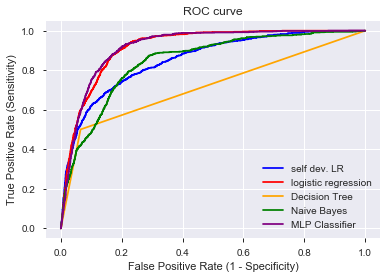

In [98]:
plt.plot(fpr,tpr,color='blue',label='self dev. LR') #self developed
plt.plot(fpr_lr,tpr_lr,color='red',label='logistic regression') #lr
plt.plot(fpr_dt,tpr_dt,color='orange',label='Decision Tree') #DT
plt.plot(fpr_nb,tpr_nb,color='green',label='Naive Bayes') #naivebayes
plt.plot(fpr_mlp,tpr_mlp,color='purple',label='MLP Classifier') #decisiontree
plt.legend(loc='lower right')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)